# Ejercicio 3 Caso Final

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

crime = pd.read_csv('crime_data.csv', sep = ',')
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
col_names = list(crime.columns)
col_names.remove('State')

crime_data = crime[col_names]

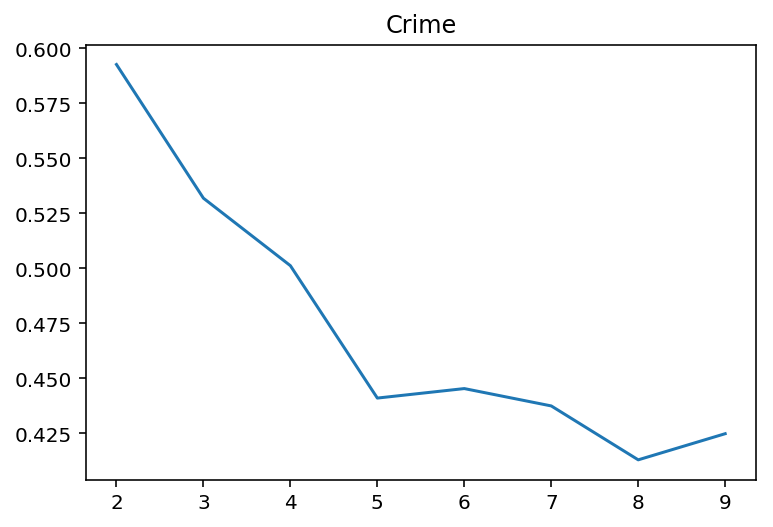

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(crime_data, 'Crime')

In [5]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(crime_data)
kmeans.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [6]:
clust = kmeans.predict(crime_data)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (crime["State"][clust == i])

Cluster 0
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: State, dtype: object
Cluster 1
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
Cluster 2
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
